# Colab setup
Clone the repo into our colab notebook

[Here's the link for the original dataset](https://www.kaggle.com/datasets/aayushmishra1512/twitchdata)

In [12]:
!git clone https://github.com/pmozil/EDA_team_21.git
%cd EDA_team_21

c:\Users\Admin\EDA_team_21\EDA_team_21\EDA_team_21


Cloning into 'EDA_team_21'...


# Twitch streamer popularity by language
We obviously begin by importing pandas/reading the dataset

In [13]:
import pandas as pd
import seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data.csv')
df.rename(columns = {'Watch time(Minutes)': 'Wtime'}, inplace = True)

## Relation between follower count and watch time
The relation may be linear, as it followers quite obviously relate to view time

*The relation between the verage viewer count and the view time should be linear*

In [14]:
x_axis = df["Followers"]
y_axis = df["Wtime"]
reg = np.polyfit(x_axis, y_axis, 1)
linear_func = np.poly1d(reg)

Let's do a quadratic function while we're at it

In [15]:
coeffs = np.polyfit(x_axis, y_axis, 2)
# create a quadratic function for the coefficients
def quadratic_func(x):
  return x**2*coeffs[0] + x*coeffs[1] + coeffs[2]

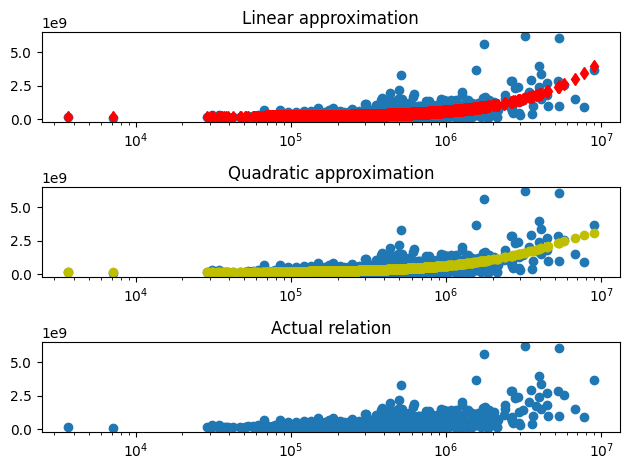

In [16]:
plots, axis = plt.subplots(3, 1)
axis[0].plot(x_axis, linear_func(x_axis), 'rd')
axis[0].scatter(x_axis, y_axis)
axis[0].set_xscale("log")
axis[0].set_title("Linear approximation")
axis[1].plot(x_axis, quadratic_func(x_axis), 'yo')
axis[1].scatter(x_axis, y_axis)
axis[1].set_title("Quadratic approximation")
axis[1].set_xscale("log")
axis[2].scatter(x_axis, y_axis)
axis[2].set_xscale("log")
axis[2].set_title("Actual relation")

plt.tight_layout()

For small follower counts, the function is rather precise. For obvious reasons, we are interested in small follower counts.

*Note that the follower count is small only relatively. It is still very big, as we only have the top 1000 streamers*

It is obvious that the functions are very imprecise, as they are crude approximations. **The real predictor would probabaly be a function of about all the variables in the dataset, but that is beyond what we are suposed to do.**

Also, note the anomalies on the right side of the graph: there are streamers, whose view time if much bigger than it should be, if looking at their follower count. It is because many popular streamers have much more active viewers that subscribers.

For this reason, we shall also explore th relation between the viewer and follower count.

## How does the eviewer count relate to the follower count? 

In [17]:
x_axis = df["Followers"]
y_axis = df["Average viewers"]
reg = np.polyfit(x_axis, y_axis, 1)
linear_func = np.poly1d(reg)

In [18]:
coeffs = np.polyfit(x_axis, y_axis, 2)
# create a quadratic function for the coefficients
def quadratic_func(x):
  return x**2*coeffs[0] + x*coeffs[1] + coeffs[0]

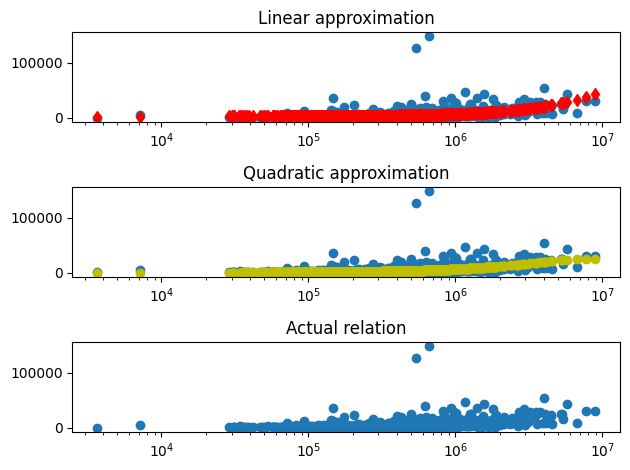

In [19]:
plots, axis = plt.subplots(3, 1)
axis[0].plot(x_axis, linear_func(x_axis), 'rd')
axis[0].scatter(x_axis, y_axis)
axis[0].set_xscale("log")
axis[0].set_title("Linear approximation")
axis[1].plot(x_axis, quadratic_func(x_axis), 'yo')
axis[1].scatter(x_axis, y_axis)
axis[1].set_title("Quadratic approximation")
axis[1].set_xscale("log")
axis[2].scatter(x_axis, y_axis)
axis[2].set_xscale("log")
axis[2].set_title("Actual relation")

# Set logarithmic scale, too many dots at the start
# plt.xscale('log')
plt.tight_layout()

The anomalies here are much better visible than in the case of followers/wiew time, as there certainly are a couple streamers who are very popular with viewers, but not subscribers (and that is the most popular ones)

Here, we see that the relation between the viewer count and followers if linear, barring the approximation error.

Also, here the relation is more or less linear, say for a few anomalies

# Mature vs immature language streamer partnerships

This too, seems like an interesting topic. Let's plot it!

<AxesSubplot: xlabel='Mature', ylabel='count'>

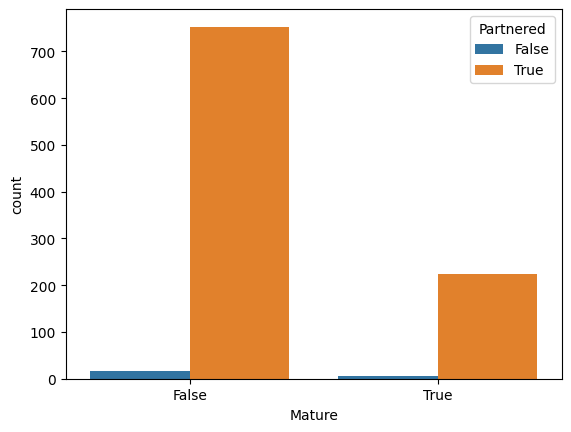

In [20]:
sns.countplot(x="Mature", hue ="Partnered", data=df)

Oh, right. It's the top 1000 streamers, of course most of them would be partnered. Let's look at the numbers then. Maybe the relation of partnered to unpartnered is much smaller with the streamers, who don't use mature language?

In [21]:
print(len(df[df["Mature"] & df["Partnered"]])/len(df[df["Mature"]]))
print(len(df[~df["Mature"] & df["Partnered"]])/len(df[~df["Mature"]]))

0.9782608695652174
0.977922077922078


Nope, not even that! See, if you're popular, it doesn't matter if you swear!

## Comparing viewers for mature and not mature streamers

Streamers are becoming more and more popular so it is interesting to make a comparision between mature and immature streamers. So, lets start!

Firstly, I divided mature and immature streamers into two groups and created two graphs, which will help you to see general background.
During research I showed 25 mature and immature streamers. 
This information is enough to understand which streamers people like the most

<AxesSubplot: xlabel='Average viewers', ylabel='Channel'>

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Py

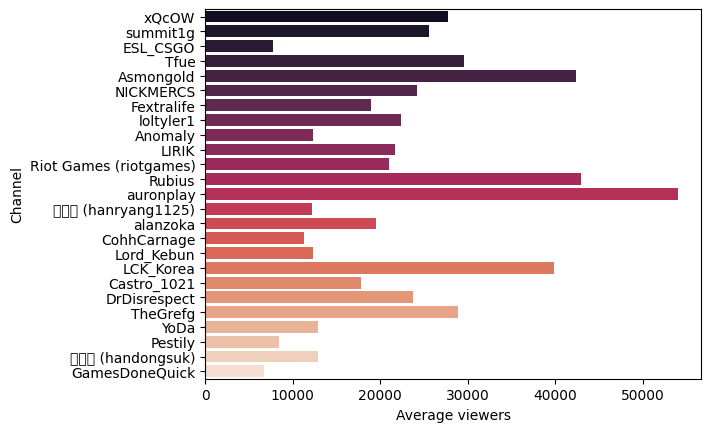

In [22]:
find_False = df[df["Mature"]== False]
A = find_False.head(25)
seaborn.barplot(data = A, y = 'Channel', x = 'Average viewers', palette='rocket')

<AxesSubplot: xlabel='Average viewers', ylabel='Channel'>

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 34662 (\N{CJK UNIFIED IDEOGRAPH-8766}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24859 (\N{CJK UNIFIED IDEOGRAPH-611B}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 27224 (\N{CJK UNIFIED IDEOGRAPH-6A58}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 32769 (\N{CJK UNIFIED IDEOGRAPH-8001}) missing from current font.
  func(*args, **kwargs)
C:\Users\A

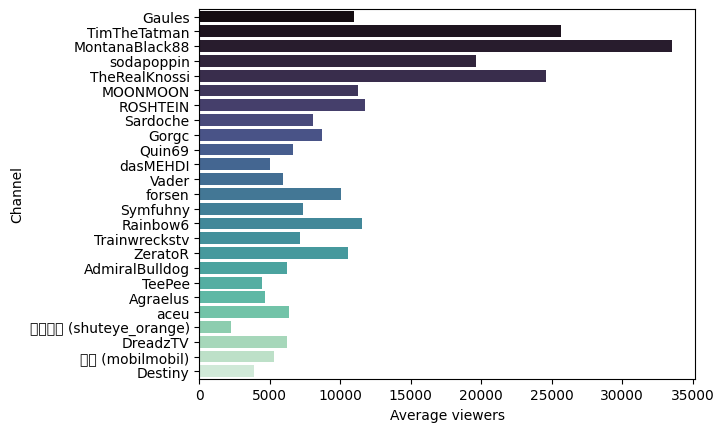

In [23]:
find_True = df[df["Mature"]== True]
B = find_True.head(25)
seaborn.barplot(data = B, y = 'Channel', x = 'Average viewers', palette= 'mako')

In conclusion, you can see that people like watching immature streamers most.